# Práctica 1. Aprendizaje automático

Grupo 16: Adina Han, Diego Ambite 

### 1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución y su correlación.

¿¿¿¿¿¿¿¿¿¿¿¿ Corelación, hay valores extremos -> outliers, si están en la misma unidad ??????????

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [38]:
 data_crimes = pd.read_csv('USArrests.csv', index_col = 0)  

In [39]:
data_crimes.keys()

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Tabla con el nombre de las variables

In [40]:
df = pd.DataFrame(data=data_crimes) 
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Tabla de estadísticos descriptivos de cada variable

In [41]:
df.describe()
#std -> standard deviation , a measure of a distribution of the array elements

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Tabla de tipos de las variables

In [42]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

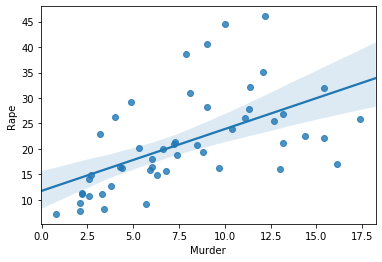

In [54]:
sns.regplot(x="Murder", y = "Rape", data=data_crimes)

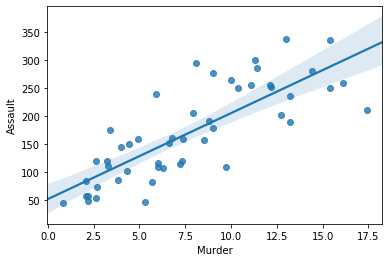

In [55]:
sns.regplot(x="Murder", y = "Assault", data=data_crimes)

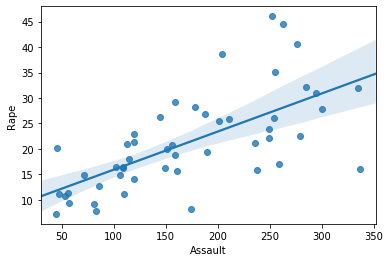

In [61]:
sns.regplot(x="Assault", y = "Rape", data=data_crimes)

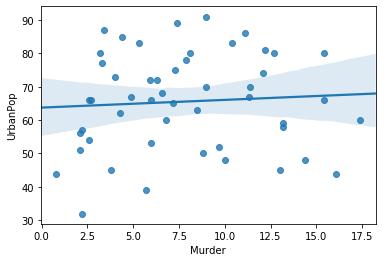

In [58]:
sns.regplot(x="Murder", y = "UrbanPop", data=data_crimes)

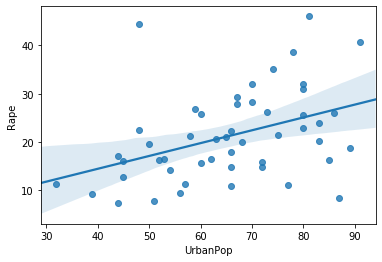

In [60]:
sns.regplot(x="UrbanPop", y = "Rape", data=data_crimes)

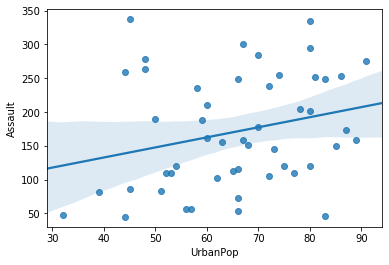

In [59]:
sns.regplot(x="UrbanPop", y = "Assault", data=data_crimes)

Conclusiones: 

Este Dataset contiene estadisticas sobre los arrestos realizados en los 50 estados de EEUU, en el año 1973. En particular para los delitos de Asesinato, Asalto y violacion ademas de incluir la poblacion urbana de esos estados. 

Lo primero que nos encontramos es que no estan todos los datos en la misma unidad, hay datos que estan en porcentaje (Murder y Rape) mientras que otros son numero de residentes por cada 100.000 que han cometido el delito (Assault y UrbanPop).

La desviación típica, nos indica para Murder, Rape y UrbanPop están agrupados en torno a su valor medio. En cambio la desviacion tipica de Assault nos dice que presenta valores atípicos alejados de la media que hace que los datos se extiendan sobre un rango mayor que el resto.

Otra conclusión que se puede obtener mediante las scatter plots usando la regresion para obtener una idea de la correlación entre las distintas variables estadísticas es que para Murder y Assault estan muy correlacionadas ya que el crecimiento de una conlleva el crecimiento de la otra quedando agrupadas cerca de la linea de regresion lineal.

En cambio, para los otros pares de variables (Murder/Rape y Assault/Rape) si sigue habiendo una correlación relativamente fuerte, es mas comun los casos en los que una variable tiene un valor muy alto para una componente y bajo para la otra, es decir casos con poca correlacion entre ellas.

Finalmente comprobando las Scatter Plots de los delitos respecto a la UrbanPop no se puede afirmar que exista una corralacion, es decir una mayor plblacion urbana no conlleva un mayor numero de delitos. Haciendo que haya pocos puntos cerca de la linea de regresión lineal, y estando muy distribuidos por toda la gráfica.

### 2. Considera si debes re‐escalar las variables antes y el tipo de escalado que usas. Razona tu elección.

In [67]:
scaler = StandardScaler()
data_crimes_standardized = scaler.fit_transform(data_crimes)

#data_crimes_standardized = preprocessing.StandardScaler(data_crimes)
print(data_crimes_standardized)
data_crimes_standardized = pd.DataFrame(data_crimes_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

Hemos elegido reescalar las variables del dataset para tener una mayor homogeneidad....
Para obtenr una mayor homogeidad en los datos, hemos decidido reescalar las variables ya que algunas como Assault tiene un límite superior muy elevado (335) comparado con el limite superior de Muder que tiene (17.4).

El tipo de escalado que hemos usado es el escalado estarndard (Standard Scaler) el cual a cada dato le resta la media de la variable y se le divide por la desviacion tipica. Como la media y la desviacion típica son sensibles a valores atípicos, pero aun asi el impacto del ruido de estos valores queda disminuido.


### 3. Aplica un algoritmo de clustering de los que hemos visto en clase con una parametrización (el valor de k en el algoritmo de k‐medias, o la forma en la que se agrupan clusters en el caso jerárquico).

### Determina el número de clusters que consideras adecuado para el conjunto de datos y justifica tu elección.

En primer lugar, y debido a que nuestro dataset contiene un total del 4 metricas, de las cuales realmente son 3 las que tienen mayor interes, ya que en la seccion anterior ya hemos visto que el impacto de UrbanPop no es realmente significativo, lo que vamos a hacer es mostrarlas en parejas de manera que tengamos una idea aproximada de cual es su distribucion, para de esta manera tambien poder percibir si se puede hacer una primera estimacion del numero de clusters que vamos a tener.

#### Murder / Rape

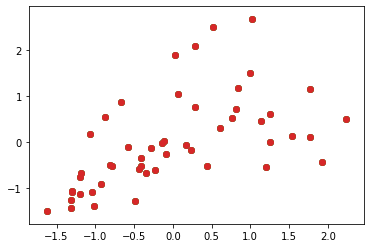

In [63]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[3])

#### Murder / Assault

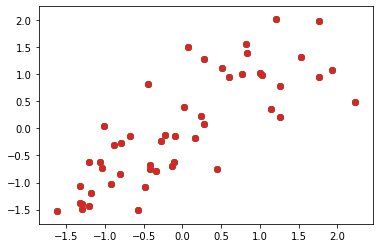

In [12]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[1])

#### Assault / Rape

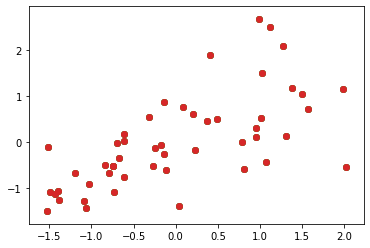

In [13]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[1], data_crimes_standardized[3])

Como podemos observar en las tres gráficas no hay una distribucion que permita afimar que hay un numero claro de clusters, por lo tanto recurrimos a otras tecnicas para calcular el numero de clusters que debemos emplear.

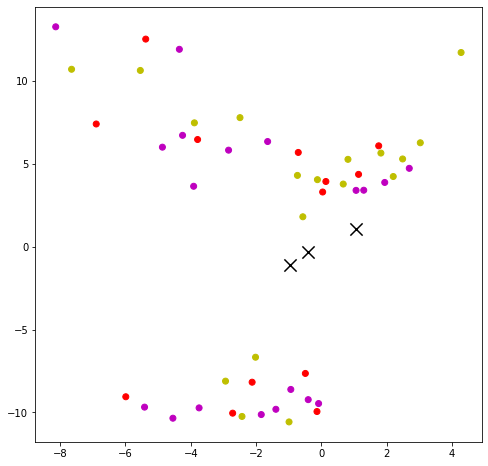

In [114]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=333)

# Agrupar los puntos en clusters
km.fit(data_crimes_standardized)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(X, labels, centers)

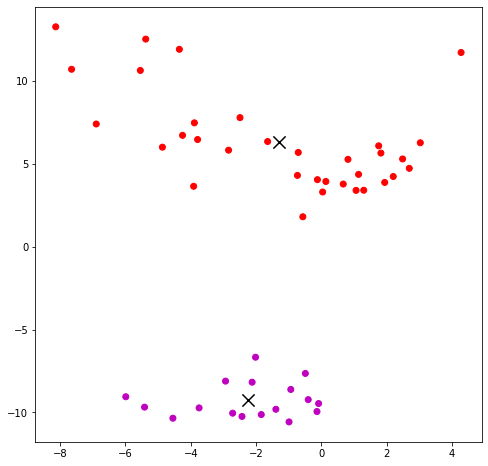

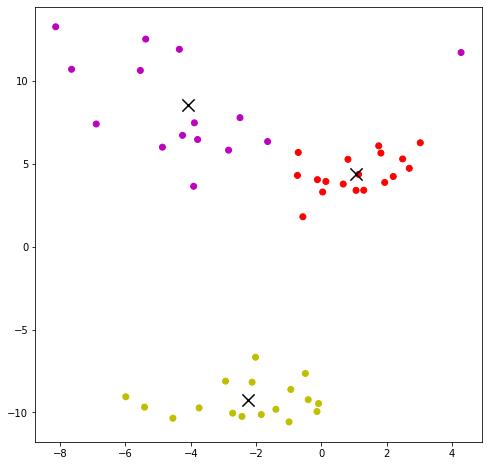

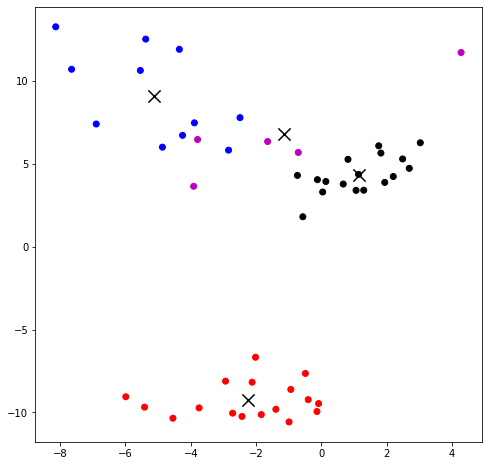

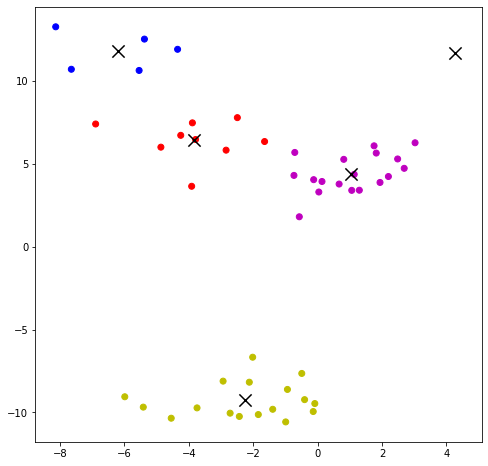

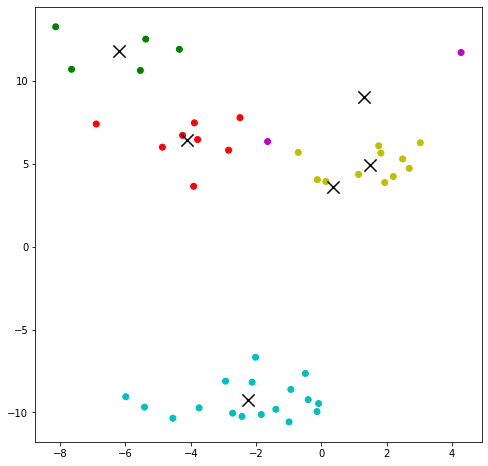

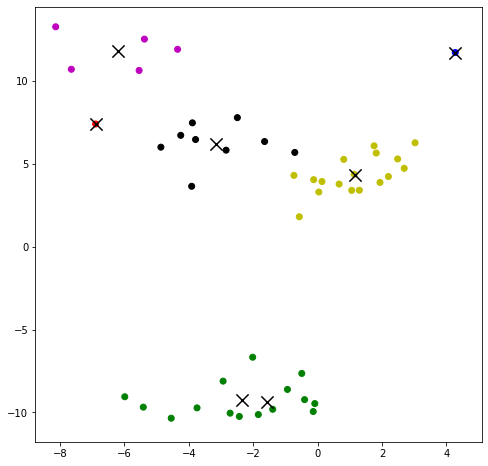

In [112]:
#numero de Ks a probar
K_MAX = 8
#creamos un array de K_MAX posciones donde almacenaremos los valores Davies Boulding, inicialmente repleto de 0.
davies_boulding = np.zeros(K_MAX - 2)

for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_) 

In [107]:
davies_boulding

array([0.51710908, 0.70718244, 0.93096102, 0.74016841, 1.11014197,
       0.7803767 ])

In [108]:
np.amin(davies_boulding)

0.5171090848414353

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

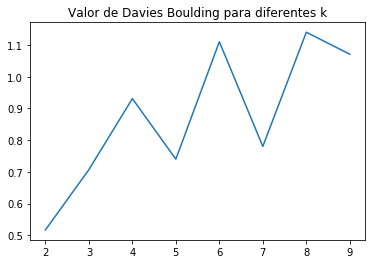

In [99]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

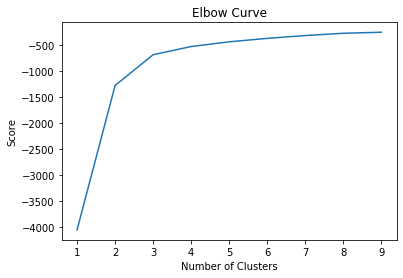

In [69]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Hemos utilizado un algoritmo de clustering no jerarquico (K-Means) y hemos ejecutado este algoritmo para un rango de valores (de 1 a 10) para ver los resultados y comparar características de los grupos obtenidos.

Una de las métricas usadas para comparar resultados es la distancia media entre los puntos de los datos y su centroide, como el valor de la media disminuira a medida que aumentamos el valor de k (numero de clusters) debemos utilizar la distancia media al centroide en funcion de k y encontrar "el punto codo" donde la tasa de ascenso se estabiliza. Tal y como se ve en la gráfica del punto codo el valor se estabiliza alrededor del 3 y por lo tanto vamos a elegir 3 como el numero de clusters.

### 4. Da un sentido a cada uno de los clusters que has obtenido en el contexto del problema que representa el conjunto de datos. Si obtienes un número mayor de 4 clusters, comenta solamente los dos los dos más numerosos y los dos menos numerosos. Para analizar los clusters:


### Usa estadísticos descriptivos (número de individuos, media, desviación típica, mediana, cuartiles) para describir los clusters.

### Usa una matriz de gráficos de dispersión que pinte los clusters usando un color diferente para ver la separación de los clusters en función de cada par de variables de entrada. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se cofunden más? Para ello, usa la función seaborn.pair_plot de la librería de representación gráfica seaborn, como puedes ver en este ejemplo

In [70]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [83]:
labels

array([2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       1, 1, 0, 0, 2, 2])

In [84]:
plot_clusters(X["Murder"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [19]:
real_centers = [[1, 1], [5, 5], [7, 3]]
stds = [1, 0.7, 1.7]
X, labels = make_blobs(n_samples = len(df),n_features=4, centers = None, cluster_std = stds, random_state=333)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 50
Primeros elementos de X: [[-3.67519208  6.43611569 -9.51389955 -8.09448482]
 [-1.44006346 -9.23633446 -8.65596969 -8.74064839]
 [ 1.06191881  3.40093355 -8.21559678 -1.32506094]
 [-0.56733848  1.80684791 -9.26548021 -3.92931666]
 [ 2.69141643  4.73148662 -9.14178626 -4.51484055]
 [-4.62391269 10.26946807 -9.21168951 -8.09976619]
 [-1.86241061 -9.7542423  -8.08917255 -6.59731837]
 [ 0.8138414   5.27304187 -9.78596884 -1.61960685]
 [-1.83715319 -8.83910108 -8.13756103 -7.87679003]
 [-2.25933546 -9.54686997 -8.7548482  -7.65302683]]
Primeras elementos de labels: [2 1 0 0 0 2 1 0 1 1]


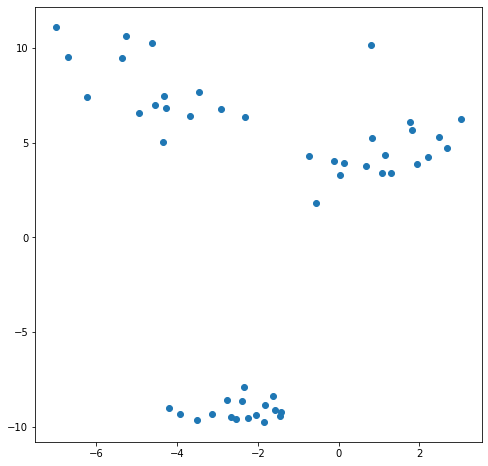

In [20]:
plot_clusters(X)

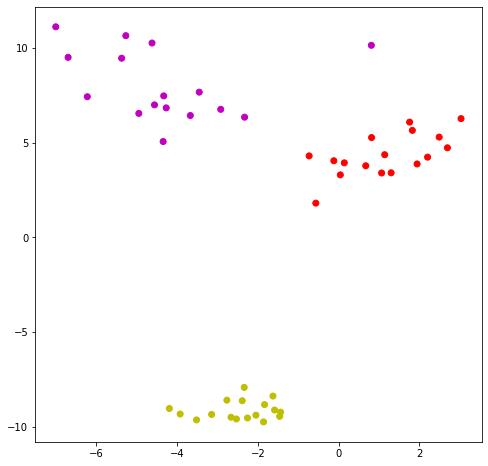

In [21]:
plot_clusters(X, labels)

## Describiendo los clusters

centroídes = el valor que toman las variables en el individuo prototípico de cada cluster.

In [76]:
km = KMeans(init='random', n_clusters=3, random_state=333)
km.fit(X)


centers = km.cluster_centers_
centers

array([[ 1.05302098,  4.41548355, -9.67228789, -3.83274297],
       [-2.24626669, -9.26653747, -8.03464738, -8.04025597],
       [-4.09066163,  8.56677768, -8.63542848, -9.1000859 ]])

In [71]:
df = pd.DataFrame(data=X, columns=['Murder','Assault', 'UrbanPop', 'Rape'])
df = df.assign(cluster=pd.Series(data=km.labels_))
df

,Murder,Assault,UrbanPop,Rape,cluster
0,-2.841815,5.828074,-9.835154,-7.685139,2
1,-0.085206,-9.467658,-9.509197,-9.528533,1
2,1.061919,3.400934,-8.215597,-1.325061,0
3,-0.567338,1.806848,-9.265480,-3.929317,0
4,2.691416,4.731487,-9.141786,-4.514841,0
5,-4.348606,11.916339,-9.355173,-7.693527,2
6,-0.990236,-10.577460,-8.294631,-4.935683,1
7,0.813841,5.273042,-9.785969,-1.619607,0
8,-0.936113,-8.616443,-8.398321,-7.677408,1
9,-1.840789,-10.133091,-9.721079,-7.197915,1


In [72]:
df.groupby(["cluster"])['Murder'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18.0,1.053021,1.194807,-0.733350,0.063662,1.100217,1.910652,3.028889
1,17.0,-2.246267,1.805770,-5.988991,-2.934962,-2.015894,-0.936113,-0.085206
2,15.0,-4.090662,2.947631,-8.134966,-5.461313,-4.250749,-3.316113,4.278018


In [73]:
df.groupby(["cluster"])['Assault'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18.0,4.415484,1.143058,1.806848,3.806155,4.270605,5.290983,6.273901
1,17.0,-9.266537,1.082237,-10.577460,-10.048967,-9.684489,-8.616443,-6.671320
2,15.0,8.566778,2.952644,3.647788,6.409758,7.477087,11.217169,13.274700


In [74]:
df.groupby(["cluster"])['UrbanPop'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18.0,-9.672288,1.166413,-11.784184,-10.313874,-9.650839,-9.172710,-6.611341
1,17.0,-8.034647,0.904286,-9.721079,-8.580640,-8.245542,-7.454211,-6.192190
2,15.0,-8.635428,2.929784,-12.867682,-10.538160,-9.805564,-6.878797,-2.317793


In [75]:
df.groupby(["cluster"])['Rape'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18.0,-3.832743,1.207844,-6.050599,-4.490059,-3.866899,-3.253491,-1.325061
1,17.0,-8.040256,1.863595,-11.875573,-9.276555,-7.802006,-7.197915,-4.139496
2,15.0,-9.100086,2.475207,-15.216768,-10.595639,-8.143840,-7.491890,-5.827236
